<a href="https://colab.research.google.com/github/waqqasansari/Machine_Learning_Probs/blob/master/hackerearth_novartis(59_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
y= train_data['MULTIPLE_OFFENSE']

print("The shape of training data is ->>", train_data.shape)
print("The shape of training data is ->>", test_data.shape)

The shape of training data is ->> (23856, 18)
The shape of training data is ->> (15903, 17)


In [3]:
print(train_data.head(5))
print(test_data.head(5))

  INCIDENT_ID       DATE  X_1  X_2  ...  X_13  X_14  X_15  MULTIPLE_OFFENSE
0   CR_102659  04-JUL-04    0   36  ...    92    29    36                 0
1   CR_189752  18-JUL-17    1   37  ...   103   142    34                 1
2   CR_184637  15-MAR-17    0    3  ...   110    93    34                 1
3   CR_139071  13-FEB-09    0   33  ...    72    29    34                 1
4   CR_109335  13-APR-05    0   33  ...   112    29    43                 1

[5 rows x 18 columns]
  INCIDENT_ID       DATE  X_1  X_2  X_3  ...  X_11  X_12  X_13  X_14  X_15
0   CR_195453  01-FEB-18    0   30   35  ...   174   NaN    72   119    23
1   CR_103520  05-MAR-04    0   44   44  ...   316   0.0    12    29    34
2   CR_196089  27-JAN-18    0   34   33  ...   316   1.0    72     0    34
3   CR_112195  18-AUG-06    7    3    2  ...   174   1.0   112    87    34
4   CR_149832  31-OCT-11    0    7    8  ...   174   0.0   112    93    43

[5 rows x 17 columns]


In [4]:
labels = train_data.columns
labels

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [5]:
#check for the nan values
print(train_data.isnull().values.any())

True


In [6]:
print(train_data.mean())

X_1                   0.483778
X_2                  24.791206
X_3                  24.637450
X_4                   4.276744
X_5                   2.455609
X_6                   6.154175
X_7                   4.876509
X_8                   0.972460
X_9                   4.924128
X_10                  1.244802
X_11                206.954519
X_12                  0.974064
X_13                 85.237383
X_14                 72.674296
X_15                 33.464747
MULTIPLE_OFFENSE      0.955231
dtype: float64


In [7]:
train_data = train_data.fillna(train_data.mean())

In [8]:
print(train_data.isnull().values.any())

False


In [9]:
def check_for_leakage(df1, df2, patient_col):

  df1_patients_unique = set(df1[patient_col].values)
  df2_patients_unique = set(df2[patient_col].values)

  patients_in_both_groups = len(df1_patients_unique.intersection(df2_patients_unique))
  leakage = bool(patients_in_both_groups > 0)

  return leakage

In [10]:
print("leakage between train and test: {}".format(check_for_leakage(train_data, test_data, 'INCIDENT_ID')))

leakage between train and test: False


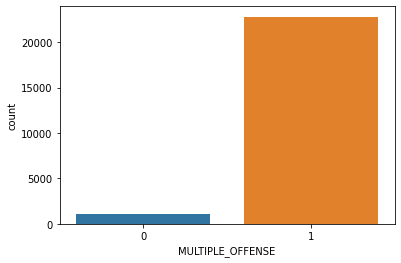

In [11]:
sns.countplot(x="MULTIPLE_OFFENSE", data=train_data)

In [17]:
train_data.drop(['MULTIPLE_OFFENSE'],axis=1,inplace=True)
train_data

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,47,48,7,3,15,10,1,5,1,174,0.0,98,29,34
23852,0,33,32,2,1,5,6,0,5,1,174,0.0,112,29,43
23853,0,25,25,9,0,3,5,1,6,1,174,0.0,10,29,18
23854,0,39,39,6,5,2,7,1,6,1,127,0.0,112,103,43


In [18]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(train_data, y,
                                                            train_size=0.75, 
                                                            random_state=0)

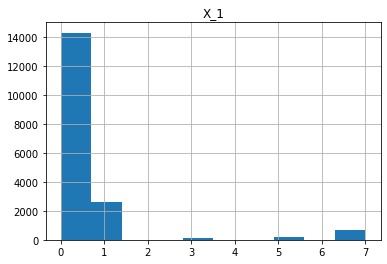

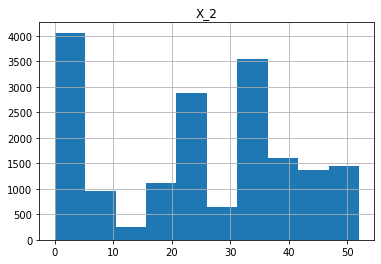

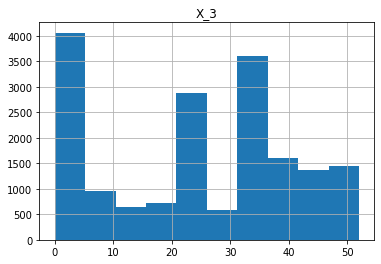

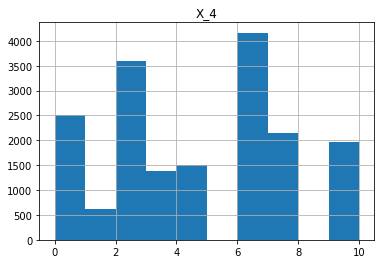

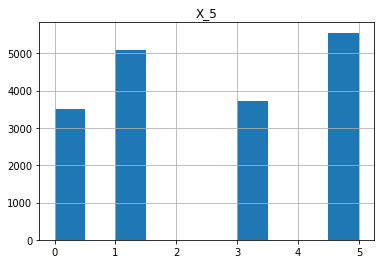

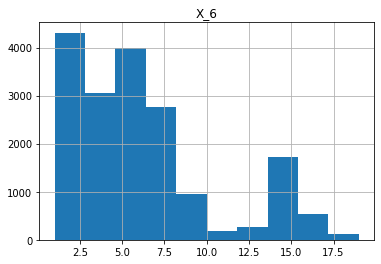

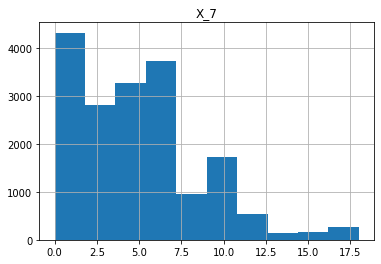

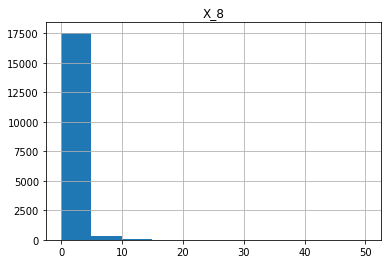

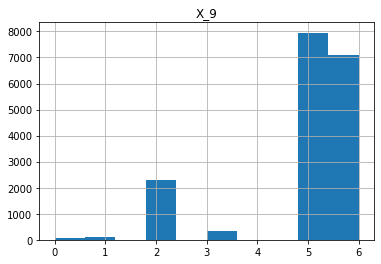

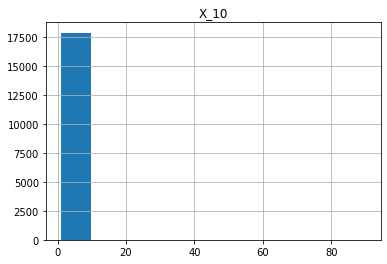

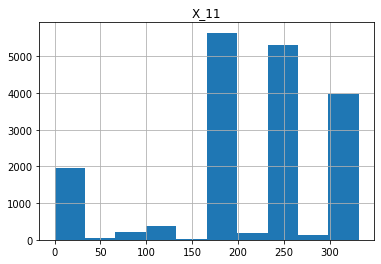

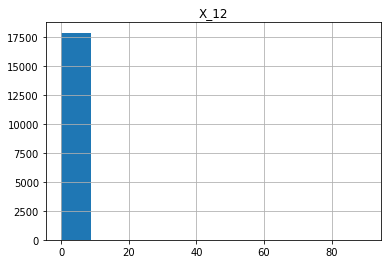

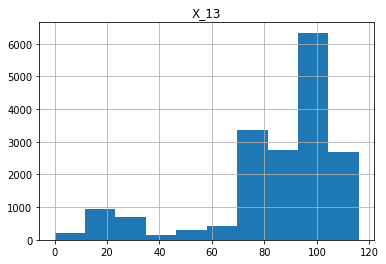

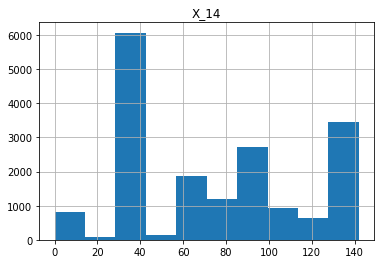

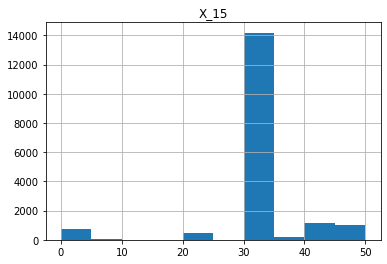

In [19]:
for col in train_data.columns:
    X_train_raw.loc[:, col].hist()
    plt.title(col)
    plt.show()

In [20]:
def make_standard_normal(df_train, df_test):


  df_train_unskewed = np.log(df_train)
  df_test_unskewed = np.log(df_test)

  mean = df_train_unskewed.mean(axis=0)
  stdev = df_train_unskewed.std(axis=0)

  df_train_standardized = (df_train_unskewed - mean) / stdev
  df_test_standardized = (df_test_unskewed - mean) / stdev

  return df_train_standardized, df_test_standardized


In [21]:
X_train, X_test = make_standard_normal(X_train_raw, X_test_raw)

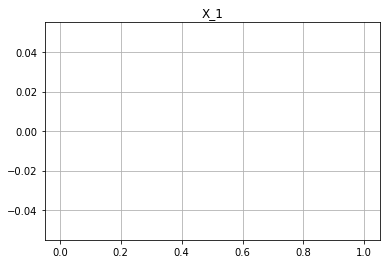

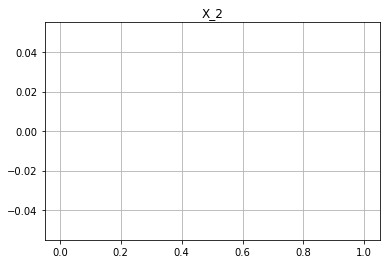

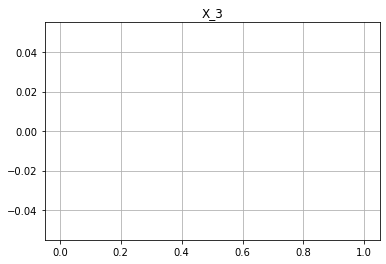

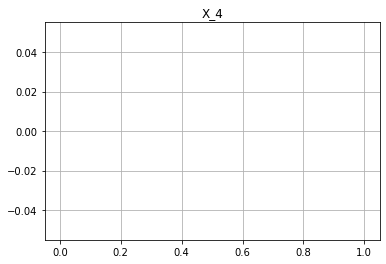

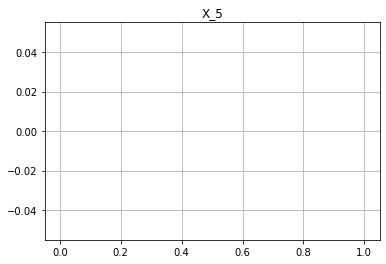

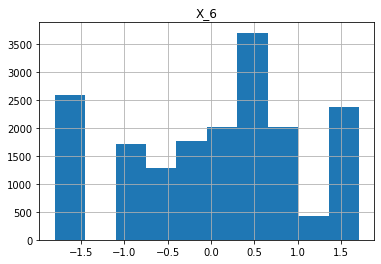

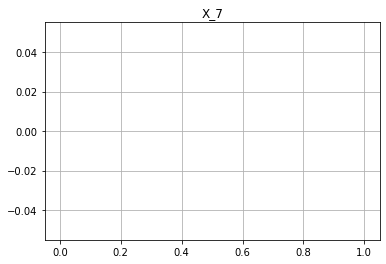

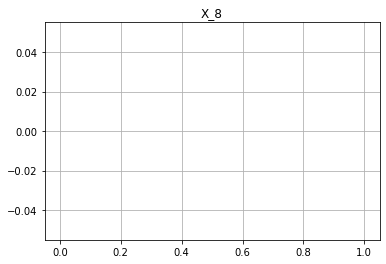

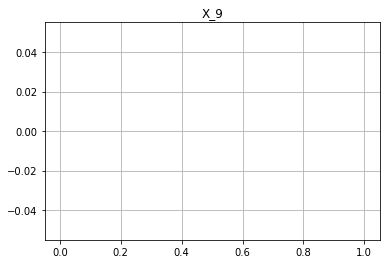

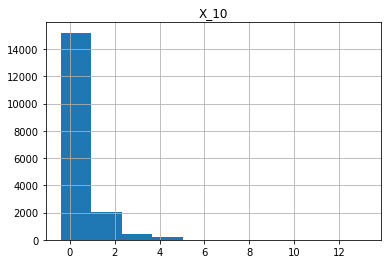

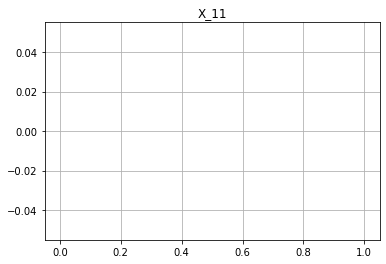

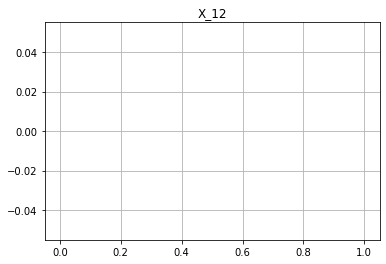

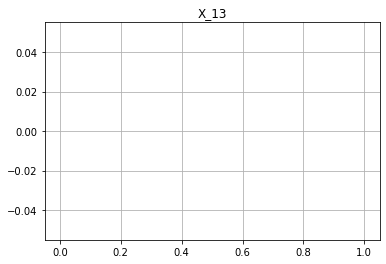

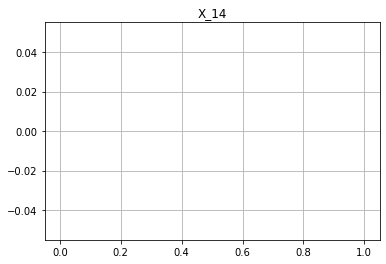

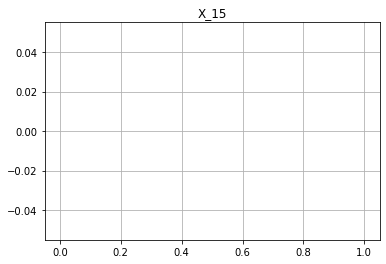

In [22]:
for col in X_train.columns:
    X_train[col].hist()
    plt.title(col)
    plt.show()

In [31]:
print(X_train.isnull().values.any())
print(y_train.isnull().values.any())

True
False


In [35]:
X_train = X_train.fillna(train_data.mean())

In [36]:
print(X_train.isnull().values.any())

False


In [77]:
X_test = X_test.fillna(test_data.mean())
print(X_train.isnull().values.any())

False


In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, pred))

0.9516543706684552
0.9485244802146211


In [67]:
test_data.drop(['INCIDENT_ID', 'DATE'],axis=1,inplace=True)
test_data

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43
15899,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34
15900,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34
15901,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34


In [79]:
test_data = test_data.fillna(test_data.mean())

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(test_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
z = model.predict(test_data)

In [82]:
submit = pd.DataFrame(columns=['INCIDENT_ID', 'MULTIPLE_OFFENSE'])
submit.head()

,INCIDENT_ID,MULTIPLE_OFFENSE


In [83]:
test_last = pd.read_csv('Test.csv')

In [84]:
submit['INCIDENT_ID'] = test_last['INCIDENT_ID']
submit

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,NaN
1,CR_103520,NaN
2,CR_196089,NaN
3,CR_112195,NaN
4,CR_149832,NaN
...,...,...
15898,CR_44468,NaN
15899,CR_158460,NaN
15900,CR_115946,NaN
15901,CR_137663,NaN


In [85]:
submit['MULTIPLE_OFFENSE'] = z
submit.head(13)

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
5,CR_81654,0
6,CR_139009,1
7,CR_6108,1
8,CR_62283,1
9,CR_5710,0


In [86]:
submit.to_csv('submission(LR1).csv', index=False)

In [97]:
train_last = pd.read_csv('Train.csv')

In [105]:
model_xgb = xgb.XGBClassifier(learning_rate=0.01, max_depth = len(train_last['MULTIPLE_OFFENSE']))
model_xgb = model_xgb.fit(X_train, y_train)
predx = model_xgb.predict(X_test)
print(confusion_matrix(y_test, predx))
print(accuracy_score(y_train, model_xgb.predict(X_train)))
print(accuracy_score(y_test, pred))

[[  16  252]
 [  33 5663]]
0.956796333556897
0.9485244802146211


In [106]:
a = model_xgb.predict(test_data)

In [107]:
submit1 = pd.DataFrame(columns=['INCIDENT_ID', 'MULTIPLE_OFFENSE'])
submit1['INCIDENT_ID'] = test_last['INCIDENT_ID']
submit1['MULTIPLE_OFFENSE'] = a
submit1

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
...,...,...
15898,CR_44468,1
15899,CR_158460,1
15900,CR_115946,1
15901,CR_137663,1


In [108]:
submit.to_csv('submission(xgb2).csv', index=False)